<a href="https://colab.research.google.com/github/Chanura04/ML-Coursework/blob/main/20240955.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [4]:
!pip install keras-tuner 

In [ ]:
import pandas as pd
# from google.colab import drive
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
import keras_tuner as kt
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, callbacks, models
from sklearn.metrics import confusion_matrix

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)
import tensorflow as tf

SEED = 42
tf.random.set_seed(SEED)

## Load the dataset

In [6]:
url_x = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/X.csv"
url_y = "https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/processed/set_02/y_data.csv"

## Check dataset behaviour

In [7]:
X=pd.read_csv(url_x)
y=pd.read_csv(url_y)
X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,-1,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,-1,1,0,1,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [8]:
X.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [9]:
X.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'IsNewCustomer',
       'Contract_Monthly', 'HasFiber', 'IsHighCharge', 'Monthly_Tenure_Ratio',
       'Total_Monthly_Ratio', 'TotalServices', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [10]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


In [11]:
X.shape

(7043, 33)

In [12]:
y.shape

(7043, 1)

In [13]:
cols=[ 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

if set(cols) == set(X.columns):
    print("All columns are present.")
else:
    missing = set(cols) - set(X.columns)
    extra = set(X.columns) - set(cols)
    if missing:
        print("Missing columns:", missing)
    if extra:
        print("Extra columns:", extra)

Extra columns: {'HasFiber', 'TotalServices', 'Contract_Monthly', 'Contract_Month-to-month', 'IsHighCharge', 'PaymentMethod_Bank transfer (automatic)', 'Monthly_Tenure_Ratio', 'AvgMonthlyCharge', 'IsNewCustomer', 'InternetService_DSL', 'Total_Monthly_Ratio'}


### Split Data into Training, Validation, and Test Sets

In [41]:
# X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test= train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (4930, 33)
Shape of y_train: (4930, 1)
Shape of X_val: (1056, 33)
Shape of y_val: (1056, 1)
Shape of X_test: (1057, 33)
Shape of y_test: (1057, 1)


In [15]:
np.sum(y_val==1)

c:\Users\chanu\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Churn    280
dtype: int64

In [16]:
np.sum(y_val==0)

Churn    776
dtype: int64

Text(0.5, 1.0, 'Count Plot for Churn')

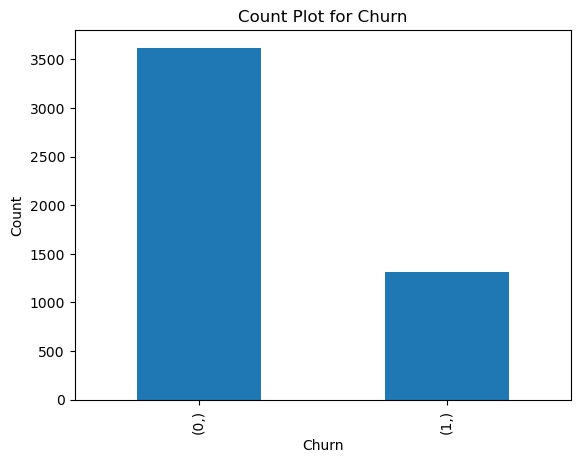

In [42]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [43]:
count

Churn
0        3622
1        1308
Name: count, dtype: int64

In [17]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


In [18]:
# Initialize the scaler
scaler = StandardScaler()

# FIT AND TRANSFORM the training data 
X_train = scaler.fit_transform(X_train)

# TRANSFORM the test data 
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [19]:
X_train[0]

array([-0.39109131, -0.77060975, -0.52110117, -0.94250403,  0.34837082,
       -0.50127946, -0.07479998, -0.17569358, -0.18308671, -0.0895356 ,
        1.14472172, -0.28855596, -1.22566115,  0.41800031, -0.7583091 ,
        0.12148485,  1.62825357,  0.75228431,  0.97437568,  1.21898728,
        0.54179294, -0.95053531, -0.32254255, -0.64043858,  0.97437568,
       -0.43732304,  0.75228431, -0.41789856, -0.44736175, -0.43418334,
       -0.42426023,  1.36749682, -0.46853881])

In [20]:
y_train = y_train.squeeze()    
y_val   = y_val.squeeze()
y_test  = y_test.squeeze()

Text(0.5, 1.0, 'Count Plot for Churn')

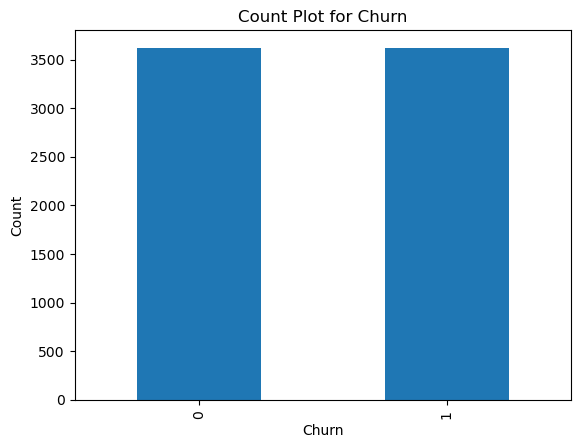

In [39]:
count=y_train.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [40]:
count

Churn
0    3622
1    3622
Name: count, dtype: int64

Text(0.5, 1.0, 'Count Plot for Churn')

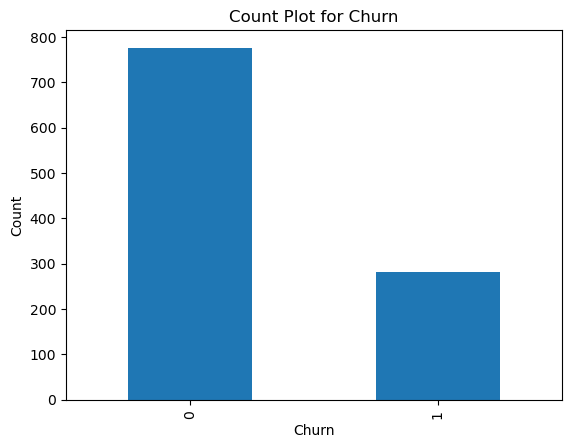

In [22]:
count=y_test.value_counts()
count.plot(kind='bar')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot for Churn')

In [23]:
def plot_history(history):
    # Loss
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Binary Crossentropy")
    plt.legend()


    # Accuracy
    plt.subplot(1,3,2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()


    # AUC
    plt.subplot(1,3,3)
    plt.plot(history.history['auc'], label='Train AUC')
    plt.plot(history.history['val_auc'], label='Validation AUC')
    plt.title("AUC Curve")
    plt.xlabel("Epochs")
    plt.ylabel("AUC Score")
    plt.legend()
    plt.show()





## Train Neural Network

#### Experiment 01

In [24]:
input_dim=X_train.shape[1]
input_dim

33

In [25]:


# # 1. Load raw data
# df = pd.read_csv("https://raw.githubusercontent.com/Chanura04/ML-Coursework/main/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# # 2. Fix TotalCharges
# df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
# df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

# # 3. Feature Engineering
# df['AvgMonthlyCharge']     = df['TotalCharges'] / (df['tenure'] + 1)
# df['IsNewCustomer']        = (df['tenure'] <= 6).astype(int)
# df['Contract_Monthly']     = (df['Contract'] == 'Month-to-month').astype(int)
# df['HasFiber']             = (df['InternetService'] == 'Fiber optic').astype(int)



# df['IsHighCharge'] = (df['MonthlyCharges'] >= 80).astype(int)


# # Ratio features
# df['Monthly_Tenure_Ratio'] = df['MonthlyCharges'] / (df['tenure'] + 1)
# df['Total_Monthly_Ratio']  = df['TotalCharges'] / (df['MonthlyCharges'] + 1)

# # 4. Proper encoding
# # Binary Yes/No → 1/0
# binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
# for col in binary_cols:
#     df[col] = df[col].map({'Yes': 1, 'No': 0})

# # MultipleLines
# df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': -1})

# # "No internet service" → -1 (keep the information!)
# no_internet_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                     'TechSupport', 'StreamingTV', 'StreamingMovies']
# for col in no_internet_cols:
#     df[col] = df[col].map({'Yes': 1, 'No': 0, 'No internet service': -1})

# # TotalServices – CORRECTED VERSION
# addon_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#               'TechSupport', 'StreamingTV', 'StreamingMovies']
# df['TotalAddons'] = (df[addon_cols] == 1).sum(axis=1)  # only count actual "Yes"
# df['TotalServices'] = (
#     (df['PhoneService'] == 1).astype(int) +
#     (df['InternetService'] != 'No').astype(int) +
#     df['TotalAddons']
# )
# df.drop('TotalAddons', axis=1, inplace=True)

# # 5. One-hot encoding
# df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=False,dtype=int)


# # 6. Target
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# # 7. Drop useless columns
# df.drop(['customerID', 'gender'], axis=1, inplace=True)

# # 8. Split before scaling
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# # 9. Scale only continuous columns
# scaler = StandardScaler()
# num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges',
#             'AvgMonthlyCharge', 'Monthly_Tenure_Ratio', 'Total_Monthly_Ratio']

# X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
# X_val[num_cols]   = scaler.transform(X_val[num_cols])
# X_test[num_cols]  = scaler.transform(X_test[num_cols])

# # To numpy


# print("Final shape:", X_train.shape)  # → usually (4922, 34) or similar

In [26]:
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)


# X_train = X_train.values.astype('float32')
# X_val   = X_val.values.astype('float32')
# X_test  = X_test.values.astype('float32')
# y_train = y_train.squeeze()    
# y_val   = y_val.squeeze()
# y_test  = y_test.squeeze()

In [27]:

print("Final shape:", X_train.shape)

Final shape: (7244, 33)


In [28]:
len(X.columns)

33

In [ ]:
# Optional: suppress the warning
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
set_seed=42
os.environ['PYTHONHASHSEED'] = str(set_seed)

def create_final_model(input_dim):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # layers.Dense(512, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.6),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.4),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3
                       ),
        
        # layers.Dense(96, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.3),
        
        # layers.Dense(64, activation='relu'),
        # layers.BatchNormalization(),
        # layers.Dropout(0.2),
        
        layers.Dense(16, activation='relu'),
        layers.Dropout(0.2),
        # layers.BatchNormalization(),

        
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Build model
input_dim = X_train.shape[1]  # 34
model = create_final_model(input_dim)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

# Callbacks
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_auc', patience=15, restore_best_weights=True, mode='max'),
    callbacks.ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=8, min_lr=1e-7),
    callbacks.ModelCheckpoint('best_churn_model_2_2.h5', monitor='val_auc', save_best_only=True, mode='max')
]

# Class weights (important! churn is imbalanced)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}
print("Class weights:", class_weight_dict)

# TRAIN
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,
    batch_size=1024,
    callbacks=callbacks_list,
    class_weight=class_weight_dict,
    verbose=2
)

Class weights: {0: np.float64(1.0), 1: np.float64(1.0)}
Epoch 1/200


8/8 - 2s - 252ms/step - accuracy: 0.5021 - auc: 0.4843 - loss: 0.9289 - precision: 0.5015 - recall: 0.6825 - val_accuracy: 0.3589 - val_auc: 0.6816 - val_loss: 0.8256 - val_precision: 0.2891 - val_recall: 0.9714 - learning_rate: 0.0010
Epoch 2/200


8/8 - 0s - 18ms/step - accuracy: 0.6099 - auc: 0.6499 - loss: 0.7377 - precision: 0.5832 - recall: 0.7700 - val_accuracy: 0.5644 - val_auc: 0.7816 - val_loss: 0.6852 - val_precision: 0.3692 - val_recall: 0.9071 - learning_rate: 0.0010
Epoch 3/200


8/8 - 0s - 17ms/step - accuracy: 0.6713 - auc: 0.7364 - loss: 0.6391 - precision: 0.6396 - recall: 0.7849 - val_accuracy: 0.6941 - val_auc: 0.8092 - val_loss: 0.6032 - val_precision: 0.4590 - val_recall: 0.8607 - learning_rate: 0.0010
Epoch 4/200


8/8 - 0s - 16ms/step - accuracy: 0.7100 - auc: 0.7832 - loss: 0.5814 - precision: 0.6844 - recall: 0.7794 - val_accuracy: 0.7358 - val_auc: 0.8194 - val_loss: 0.5548 - val_precision: 0.5011 - val_recall: 0.7964 - learning_rate: 0.0010
Epoch 5/200


8/8 - 0s - 17ms/step - accuracy: 0.7305 - auc: 0.8037 - loss: 0.5539 - precision: 0.7128 - recall: 0.7722 - val_accuracy: 0.7462 - val_auc: 0.8233 - val_loss: 0.5229 - val_precision: 0.5147 - val_recall: 0.7500 - learning_rate: 0.0010
Epoch 6/200


8/8 - 0s - 19ms/step - accuracy: 0.7461 - auc: 0.8223 - loss: 0.5269 - precision: 0.7345 - recall: 0.7708 - val_accuracy: 0.7491 - val_auc: 0.8255 - val_loss: 0.5011 - val_precision: 0.5196 - val_recall: 0.7107 - learning_rate: 0.0010
Epoch 7/200


8/8 - 0s - 17ms/step - accuracy: 0.7564 - auc: 0.8365 - loss: 0.5042 - precision: 0.7521 - recall: 0.7648 - val_accuracy: 0.7538 - val_auc: 0.8274 - val_loss: 0.4873 - val_precision: 0.5279 - val_recall: 0.6750 - learning_rate: 0.0010
Epoch 8/200


8/8 - 0s - 18ms/step - accuracy: 0.7628 - auc: 0.8390 - loss: 0.5064 - precision: 0.7580 - recall: 0.7722 - val_accuracy: 0.7566 - val_auc: 0.8297 - val_loss: 0.4776 - val_precision: 0.5333 - val_recall: 0.6571 - learning_rate: 0.0010
Epoch 9/200


8/8 - 0s - 20ms/step - accuracy: 0.7750 - auc: 0.8526 - loss: 0.4830 - precision: 0.7726 - recall: 0.7794 - val_accuracy: 0.7604 - val_auc: 0.8320 - val_loss: 0.4698 - val_precision: 0.5396 - val_recall: 0.6571 - learning_rate: 0.0010
Epoch 10/200


8/8 - 0s - 33ms/step - accuracy: 0.7804 - auc: 0.8572 - loss: 0.4750 - precision: 0.7808 - recall: 0.7797 - val_accuracy: 0.7699 - val_auc: 0.8330 - val_loss: 0.4643 - val_precision: 0.5559 - val_recall: 0.6571 - learning_rate: 0.0010
Epoch 11/200


8/8 - 0s - 16ms/step - accuracy: 0.7834 - auc: 0.8626 - loss: 0.4683 - precision: 0.7854 - recall: 0.7800 - val_accuracy: 0.7784 - val_auc: 0.8340 - val_loss: 0.4599 - val_precision: 0.5706 - val_recall: 0.6643 - learning_rate: 0.0010
Epoch 12/200


8/8 - 0s - 15ms/step - accuracy: 0.7909 - auc: 0.8702 - loss: 0.4538 - precision: 0.7884 - recall: 0.7951 - val_accuracy: 0.7822 - val_auc: 0.8348 - val_loss: 0.4560 - val_precision: 0.5796 - val_recall: 0.6500 - learning_rate: 0.0010
Epoch 13/200


8/8 - 0s - 17ms/step - accuracy: 0.7947 - auc: 0.8748 - loss: 0.4477 - precision: 0.7933 - recall: 0.7971 - val_accuracy: 0.7775 - val_auc: 0.8348 - val_loss: 0.4534 - val_precision: 0.5714 - val_recall: 0.6429 - learning_rate: 0.0010
Epoch 14/200
8/8 - 0s - 13ms/step - accuracy: 0.7949 - auc: 0.8788 - loss: 0.4400 - precision: 0.7957 - recall: 0.7935 - val_accuracy: 0.7803 - val_auc: 0.8348 - val_loss: 0.4512 - val_precision: 0.5764 - val_recall: 0.6464 - learning_rate: 0.0010
Epoch 15/200


8/8 - 0s - 15ms/step - accuracy: 0.7931 - auc: 0.8783 - loss: 0.4419 - precision: 0.7933 - recall: 0.7927 - val_accuracy: 0.7775 - val_auc: 0.8359 - val_loss: 0.4496 - val_precision: 0.5714 - val_recall: 0.6429 - learning_rate: 0.0010
Epoch 16/200


8/8 - 0s - 15ms/step - accuracy: 0.8038 - auc: 0.8844 - loss: 0.4299 - precision: 0.8036 - recall: 0.8043 - val_accuracy: 0.7812 - val_auc: 0.8364 - val_loss: 0.4480 - val_precision: 0.5798 - val_recall: 0.6357 - learning_rate: 0.0010
Epoch 17/200


8/8 - 0s - 17ms/step - accuracy: 0.8095 - auc: 0.8922 - loss: 0.4178 - precision: 0.8093 - recall: 0.8098 - val_accuracy: 0.7841 - val_auc: 0.8365 - val_loss: 0.4469 - val_precision: 0.5867 - val_recall: 0.6286 - learning_rate: 0.0010
Epoch 18/200


8/8 - 0s - 17ms/step - accuracy: 0.8092 - auc: 0.8911 - loss: 0.4196 - precision: 0.8116 - recall: 0.8054 - val_accuracy: 0.7888 - val_auc: 0.8371 - val_loss: 0.4445 - val_precision: 0.5960 - val_recall: 0.6321 - learning_rate: 0.0010
Epoch 19/200


8/8 - 0s - 15ms/step - accuracy: 0.8089 - auc: 0.8925 - loss: 0.4144 - precision: 0.8131 - recall: 0.8023 - val_accuracy: 0.7879 - val_auc: 0.8371 - val_loss: 0.4425 - val_precision: 0.5979 - val_recall: 0.6107 - learning_rate: 0.0010
Epoch 20/200


8/8 - 0s - 17ms/step - accuracy: 0.8096 - auc: 0.8963 - loss: 0.4085 - precision: 0.8196 - recall: 0.7940 - val_accuracy: 0.7917 - val_auc: 0.8380 - val_loss: 0.4415 - val_precision: 0.6027 - val_recall: 0.6286 - learning_rate: 0.0010
Epoch 21/200


8/8 - 0s - 16ms/step - accuracy: 0.8121 - auc: 0.8958 - loss: 0.4116 - precision: 0.8171 - recall: 0.8043 - val_accuracy: 0.7945 - val_auc: 0.8396 - val_loss: 0.4399 - val_precision: 0.6098 - val_recall: 0.6250 - learning_rate: 0.0010
Epoch 22/200
8/8 - 0s - 13ms/step - accuracy: 0.8163 - auc: 0.8989 - loss: 0.4038 - precision: 0.8204 - recall: 0.8098 - val_accuracy: 0.7955 - val_auc: 0.8395 - val_loss: 0.4398 - val_precision: 0.6111 - val_recall: 0.6286 - learning_rate: 0.0010
Epoch 23/200
8/8 - 0s - 12ms/step - accuracy: 0.8142 - auc: 0.8995 - loss: 0.4029 - precision: 0.8206 - recall: 0.8043 - val_accuracy: 0.7917 - val_auc: 0.8391 - val_loss: 0.4398 - val_precision: 0.6042 - val_recall: 0.6214 - learning_rate: 0.0010
Epoch 24/200
8/8 - 0s - 12ms/step - accuracy: 0.8223 - auc: 0.9036 - loss: 0.3959 - precision: 0.8293 - recall: 0.8117 - val_accuracy: 0.7917 - val_auc: 0.8394 - val_loss: 0.4398 - val_precision: 0.6034 - val_recall: 0.6250 - learning_rate: 0.0010
Epoch 25/200
8/8 - 0s

8/8 - 0s - 27ms/step - accuracy: 0.8262 - auc: 0.9063 - loss: 0.3908 - precision: 0.8320 - recall: 0.8175 - val_accuracy: 0.7850 - val_auc: 0.8397 - val_loss: 0.4365 - val_precision: 0.5917 - val_recall: 0.6107 - learning_rate: 5.0000e-04
Epoch 31/200
8/8 - 0s - 14ms/step - accuracy: 0.8328 - auc: 0.9111 - loss: 0.3800 - precision: 0.8376 - recall: 0.8258 - val_accuracy: 0.7879 - val_auc: 0.8396 - val_loss: 0.4362 - val_precision: 0.5986 - val_recall: 0.6071 - learning_rate: 5.0000e-04
Epoch 32/200
8/8 - 0s - 13ms/step - accuracy: 0.8268 - auc: 0.9102 - loss: 0.3801 - precision: 0.8354 - recall: 0.8139 - val_accuracy: 0.7879 - val_auc: 0.8395 - val_loss: 0.4358 - val_precision: 0.5993 - val_recall: 0.6036 - learning_rate: 5.0000e-04
Epoch 33/200
8/8 - 0s - 12ms/step - accuracy: 0.8252 - auc: 0.9081 - loss: 0.3850 - precision: 0.8341 - recall: 0.8120 - val_accuracy: 0.7879 - val_auc: 0.8392 - val_loss: 0.4361 - val_precision: 0.5986 - val_recall: 0.6071 - learning_rate: 5.0000e-04
Epoch

8/8 - 0s - 15ms/step - accuracy: 0.8279 - auc: 0.9104 - loss: 0.3806 - precision: 0.8402 - recall: 0.8098 - val_accuracy: 0.7917 - val_auc: 0.8400 - val_loss: 0.4339 - val_precision: 0.6079 - val_recall: 0.6036 - learning_rate: 5.0000e-04
Epoch 38/200


8/8 - 0s - 19ms/step - accuracy: 0.8262 - auc: 0.9104 - loss: 0.3818 - precision: 0.8371 - recall: 0.8100 - val_accuracy: 0.7879 - val_auc: 0.8403 - val_loss: 0.4333 - val_precision: 0.6022 - val_recall: 0.5893 - learning_rate: 5.0000e-04
Epoch 39/200


8/8 - 0s - 21ms/step - accuracy: 0.8243 - auc: 0.9093 - loss: 0.3793 - precision: 0.8370 - recall: 0.8054 - val_accuracy: 0.7898 - val_auc: 0.8405 - val_loss: 0.4332 - val_precision: 0.6051 - val_recall: 0.5964 - learning_rate: 5.0000e-04
Epoch 40/200


8/8 - 0s - 17ms/step - accuracy: 0.8292 - auc: 0.9116 - loss: 0.3787 - precision: 0.8375 - recall: 0.8170 - val_accuracy: 0.7898 - val_auc: 0.8406 - val_loss: 0.4330 - val_precision: 0.6058 - val_recall: 0.5929 - learning_rate: 5.0000e-04
Epoch 41/200
8/8 - 0s - 13ms/step - accuracy: 0.8295 - auc: 0.9146 - loss: 0.3699 - precision: 0.8431 - recall: 0.8098 - val_accuracy: 0.7926 - val_auc: 0.8404 - val_loss: 0.4331 - val_precision: 0.6117 - val_recall: 0.5964 - learning_rate: 5.0000e-04
Epoch 42/200
8/8 - 0s - 12ms/step - accuracy: 0.8226 - auc: 0.9105 - loss: 0.3780 - precision: 0.8315 - recall: 0.8092 - val_accuracy: 0.7926 - val_auc: 0.8402 - val_loss: 0.4330 - val_precision: 0.6101 - val_recall: 0.6036 - learning_rate: 5.0000e-04
Epoch 43/200
8/8 - 0s - 15ms/step - accuracy: 0.8294 - auc: 0.9130 - loss: 0.3743 - precision: 0.8399 - recall: 0.8139 - val_accuracy: 0.7926 - val_auc: 0.8404 - val_loss: 0.4335 - val_precision: 0.6101 - val_recall: 0.6036 - learning_rate: 5.0000e-04
Epoch

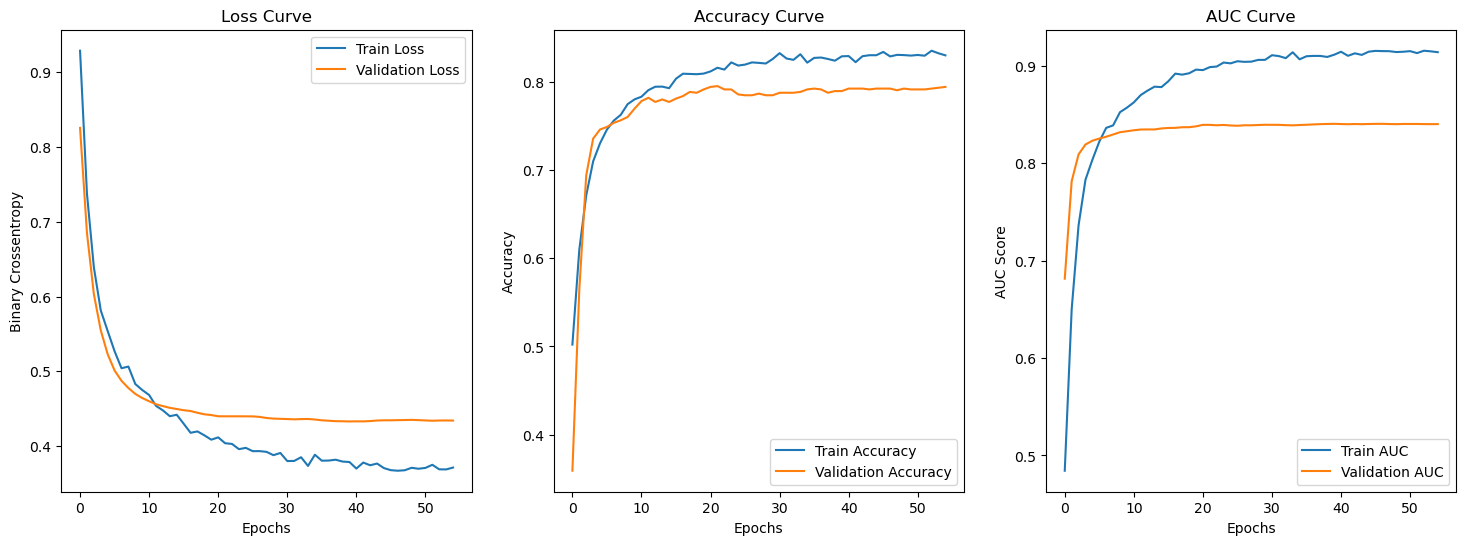

In [30]:
plot_history(history)

In [37]:
best_model_2 = keras.models.load_model('best_churn_model_2_2.h5')
test_results = best_model_2.evaluate(X_test, y_test, verbose=0)

print(f"Test AUC: {roc_auc_score(y_test, best_model_2.predict(X_test)):.4f}")
print(f"Test Accuracy: {test_results[2]:.4f}")
print(f"Test Precision: {precision_score(y_test, (best_model_2.predict(X_test) >= 0.52).astype(int)):.4f}")
print(f"Test Recall: {recall_score(y_test, (best_model_2.predict(X_test) >= 0.52).astype(int)):.4f}")

print("Classification Report:")
print(classification_report(y_test, (best_model_2.predict(X_test) >= 0.52).astype(int)))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test AUC: 0.8405
Test Accuracy: 0.8405
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step
Test Precision: 0.6128
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
Test Recall: 0.5125
Classification Report:
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       776
           1       0.61      0.51      0.56       281

    accuracy                           0.78      1057
   macro avg       0.72      0.70      0.71      1057
weighted avg       0.77      0.78      0.78      1057



34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

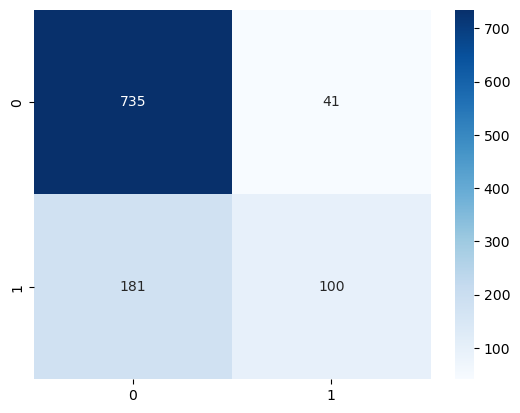

In [32]:
cm=confusion_matrix(y_test, (best_model_2.predict(X_test) >= 0.64).astype(int))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


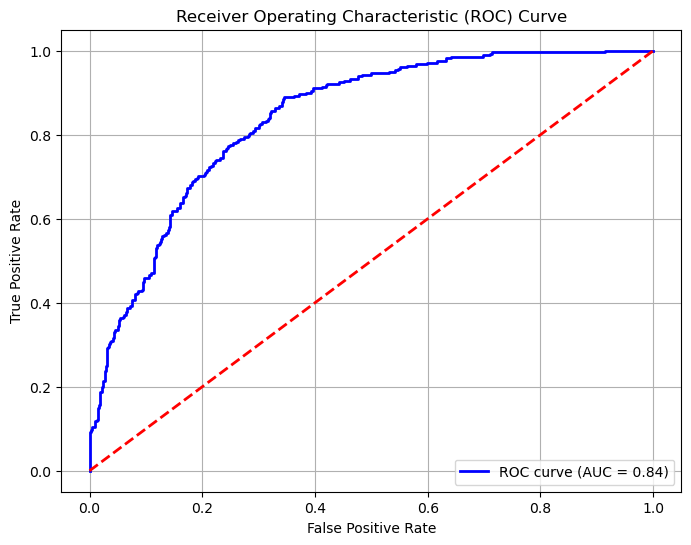

In [33]:
y_pred_prob = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)


plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()